# Train/Test Splitting and Evaluation: The Foundation of Good Forecasting

## Learning Objectives
By the end of this notebook, you will be able to:
1. Understand why random splitting doesn't work for time series
2. Perform proper time-aware train/test splitting
3. Calculate and interpret MAE, MAPE, and RMSE metrics
4. Visually evaluate forecast quality
5. Use evaluation to compare different forecasting methods


## Introduction: Why Evaluation Matters

**⚠️ CRITICAL: This notebook must come BEFORE building complex models!**

Before we build ARIMA or any other forecasting model, we need to know:
1. **How to properly split our data** (can't use random split)
2. **How to evaluate forecasts** (what makes a "good" forecast?)
3. **How to compare methods** (which model is actually better?)

**Why this matters:** If you don't know how to evaluate forecasts, you can't tell if your model is good or bad. You might think you have a great model when it's actually terrible!

**Real-World Example:** A data scientist builds a complex ARIMA model that looks perfect... until they realize they accidentally used future data to predict the past (data leakage). Proper train/test splitting prevents this!

**Think About It:** Why do you think you can't randomly shuffle time series data like you can with regular data?


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set plotting style
plt.style.use('default')

print("Libraries imported successfully")


Libraries imported successfully


In [16]:
# Load and prepare the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print("✅ Data loaded successfully")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print(f"Total months: {len(data)}")


✅ Data loaded successfully
Date range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00
Total months: 144


## Section 1: Why Random Splitting Doesn't Work

### The Problem with Random Splits

In regular machine learning, you can randomly shuffle your data and split it. **This doesn't work for time series!**

**Why?** Time series data has order. Yesterday influences today. If you randomly shuffle:
- You might use future data to predict the past
- You break the time relationships
- Your model looks perfect but will fail in real life

**This is called "data leakage"** - and it's one of the biggest mistakes in time series forecasting!

### The Right Way: Chronological Split

For time series, you must:
1. **Train on the past**
2. **Test on the future**
3. **Never shuffle the data**

**Think of it like this:** You can't use tomorrow's weather to predict yesterday's weather. You can only use yesterday's weather to predict tomorrow's weather!


In [17]:
# Proper time-aware train/test split
# Use 80% for training (past) and 20% for testing (future)
split_point = int(len(data) * 0.8)

train = data.iloc[:split_point].copy()
test = data.iloc[split_point:].copy()

print("✅ Time-aware split completed")
print(f"\nTraining Set (Past):")
print(f"  Period: {train.index.min()} to {train.index.max()}")
print(f"  Months: {len(train)}")
print(f"\nTesting Set (Future):")
print(f"  Period: {test.index.min()} to {test.index.max()}")
print(f"  Months: {len(test)}")
print(f"\n💡 Key Point: We train on PAST data and test on FUTURE data")
print("   This simulates real-world forecasting")


✅ Time-aware split completed

Training Set (Past):
  Period: 1949-01-01 00:00:00 to 1958-07-01 00:00:00
  Months: 115

Testing Set (Future):
  Period: 1958-08-01 00:00:00 to 1960-12-01 00:00:00
  Months: 29

💡 Key Point: We train on PAST data and test on FUTURE data
   This simulates real-world forecasting


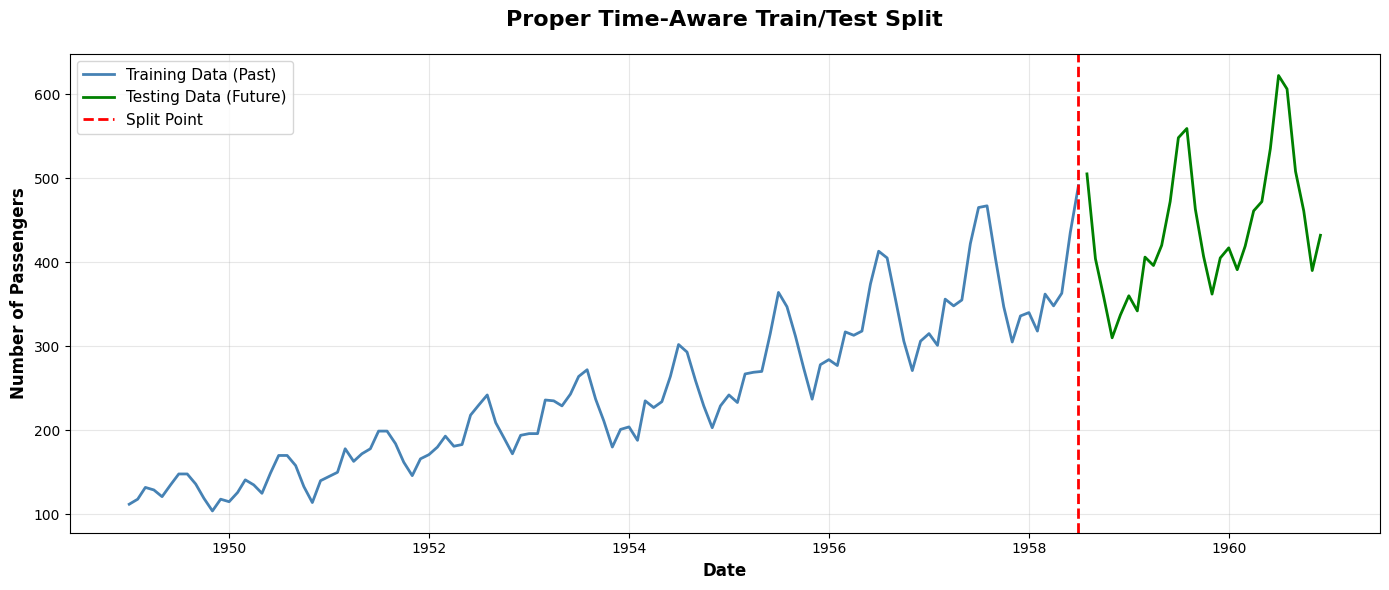


📊 Visual Explanation:
✅ Blue = Training data (we use this to build models)
✅ Green = Testing data (we use this to evaluate models)
✅ Red line = The split point (past vs future)

💡 Notice: We NEVER use future data to predict the past


In [18]:
# Visualize the split
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['#Passengers'], linewidth=2, color='steelblue', label='Training Data (Past)')
plt.plot(test.index, test['#Passengers'], linewidth=2, color='green', label='Testing Data (Future)')
plt.axvline(x=train.index.max(), color='red', linestyle='--', linewidth=2, label='Split Point')
plt.title('Proper Time-Aware Train/Test Split', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Visual Explanation:")
print("✅ Blue = Training data (we use this to build models)")
print("✅ Green = Testing data (we use this to evaluate models)")
print("✅ Red line = The split point (past vs future)")
print("\n💡 Notice: We NEVER use future data to predict the past")


## Section 2: Evaluation Metrics

Now that we've split our data properly, we need to know how to measure forecast quality. Let's learn three important metrics:

### 1. MAE (Mean Absolute Error)

**What it measures:** Average size of errors (ignoring direction)

**How to think about it:** On average, how far off are your predictions?

**Example:** If MAE = 10, your forecasts are off by 10 units on average

**When to use:** Good general-purpose metric, easy to understand

### 2. MAPE (Mean Absolute Percentage Error)

**What it measures:** Average percentage error

**How to think about it:** What percentage are you off by?

**Example:** If MAPE = 5%, your forecasts are off by 5% on average

**When to use:** Great for comparing different scales (e.g., sales of $100 vs $1,000,000)

### 3. RMSE (Root Mean Squared Error)

**What it measures:** Average of squared errors (penalizes large errors more)

**How to think about it:** Similar to MAE, but big errors count more

**Example:** If RMSE = 15, your forecasts are off by about 15 units (but large errors are penalized more)

**When to use:** When you want to penalize large errors more than small ones

**Think About It:** If you're forecasting sales, would you rather have many small errors or a few huge errors?


### Creating Example Forecasts for Evaluation

Let's create some simple forecasts so we can practice calculating these metrics:


In [19]:
# Create a simple naive forecast for demonstration
# This is just for learning - we'll use real forecasts later
naive_forecast = train['#Passengers'].iloc[-1]
test['forecast'] = naive_forecast

# Get actual values
actual = test['#Passengers'].values
forecast = test['forecast'].values

print("✅ Example forecast created (naive method)")
print(f"Forecast value: {naive_forecast:,.0f} passengers")
print(f"\nActual values (first 5): {actual[:5]}")
print(f"Forecast values (first 5): {forecast[:5]}")
print(f"\n💡 Now we can compare actual vs forecast to see how good our predictions are")


✅ Example forecast created (naive method)
Forecast value: 491 passengers

Actual values (first 5): [505 404 359 310 337]
Forecast values (first 5): [491 491 491 491 491]

💡 Now we can compare actual vs forecast to see how good our predictions are


### Calculating MAE (Mean Absolute Error)


In [20]:
# Calculate MAE manually to understand what it means
errors = np.abs(actual - forecast)
mae = np.mean(errors)

print("Calculating MAE (Mean Absolute Error):")
print("=" * 50)
print(f"Step 1: Calculate errors (actual - forecast)")
print(f"  Example errors: {errors[:5]}")
print(f"\nStep 2: Take absolute value (ignore direction)")
print(f"  (Already done - errors are always positive)")
print(f"\nStep 3: Calculate average")
print(f"  MAE = {mae:.2f} passengers")
print(f"\n💡 Interpretation:")
print(f"   On average, our forecast is off by {mae:.0f} passengers")
print(f"   Lower is better")

# Also calculate using sklearn for convenience
from sklearn.metrics import mean_absolute_error
mae_sklearn = mean_absolute_error(actual, forecast)
print(f"\n✅ Using sklearn: MAE = {mae_sklearn:.2f} (same result)")


Calculating MAE (Mean Absolute Error):
Step 1: Calculate errors (actual - forecast)
  Example errors: [ 14  87 132 181 154]

Step 2: Take absolute value (ignore direction)
  (Already done - errors are always positive)

Step 3: Calculate average
  MAE = 81.45 passengers

💡 Interpretation:
   On average, our forecast is off by 81 passengers
   Lower is better

✅ Using sklearn: MAE = 81.45 (same result)


### Calculating MAPE (Mean Absolute Percentage Error)


In [21]:
# Calculate MAPE manually
percentage_errors = np.abs((actual - forecast) / actual) * 100
mape = np.mean(percentage_errors)

print("Calculating MAPE (Mean Absolute Percentage Error):")
print("=" * 50)
print(f"Step 1: Calculate percentage error for each prediction")
print(f"  Example percentage errors: {percentage_errors[:5]:.2f}%")
print(f"\nStep 2: Calculate average")
print(f"  MAPE = {mape:.2f}%")
print(f"\n💡 Interpretation:")
print(f"   On average, our forecast is off by {mape:.1f}%")
print(f"   Lower is better")
print(f"\n📊 Business Context:")
print(f"   If actual sales are 1000 and MAPE is 5%, we're off by about 50 units")
print(f"   This helps stakeholders understand forecast accuracy in relative terms")


Calculating MAPE (Mean Absolute Percentage Error):
Step 1: Calculate percentage error for each prediction


TypeError: unsupported format string passed to numpy.ndarray.__format__

### Calculating RMSE (Root Mean Squared Error)


In [ ]:
# Calculate RMSE manually
squared_errors = (actual - forecast) ** 2
mse = np.mean(squared_errors)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print("Calculating RMSE (Root Mean Squared Error):")
print("=" * 50)
print(f"Step 1: Calculate squared errors")
print(f"  Example squared errors: {squared_errors[:5]:.2f}")
print(f"  (Squaring makes large errors count more)")
print(f"\nStep 2: Calculate mean (MSE)")
print(f"  MSE = {mse:.2f}")
print(f"\nStep 3: Take square root (RMSE)")
print(f"  RMSE = {rmse:.2f} passengers")
print(f"\n💡 Interpretation:")
print(f"   Similar to MAE, but large errors are penalized more")
print(f"   Lower is better")

# Also calculate using sklearn
from sklearn.metrics import mean_squared_error
rmse_sklearn = np.sqrt(mean_squared_error(actual, forecast))
print(f"\n✅ Using sklearn: RMSE = {rmse_sklearn:.2f} (same result)")


### Creating a Comparison Function

Let's create a function to calculate all metrics at once - we'll use this throughout the course!


In [ ]:
# Create a function to calculate all metrics
def calculate_metrics(actual, forecast, model_name="Model"):
    """
    Calculate MAE, MAPE, and RMSE for forecast evaluation.
    
    Parameters:
    - actual: Array of actual values
    - forecast: Array of forecasted values
    - model_name: Name of the model (for display)
    
    Returns:
    - Dictionary with metrics
    """
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    
    results = {
        'Model': model_name,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    }
    
    print(f"\n{'='*60}")
    print(f"Evaluation Results: {model_name}")
    print(f"{'='*60}")
    print(f"MAE  (Mean Absolute Error):      {mae:>10.2f} passengers")
    print(f"MAPE (Mean Absolute % Error):    {mape:>10.2f}%")
    print(f"RMSE (Root Mean Squared Error): {rmse:>10.2f} passengers")
    print(f"{'='*60}")
    
    return results

# Test the function with our naive forecast
results_naive = calculate_metrics(actual, forecast, "Naive Forecast")

print("\n💡 We'll use this function to compare different models")


## Section 3: Visual Evaluation

Numbers are important, but **visual evaluation is just as critical!** A plot can show you things that metrics miss.

### Why Visual Evaluation Matters

1. **See Patterns:** Do forecasts follow the same patterns as actuals?
2. **Spot Systematic Errors:** Are you always too high or too low?
3. **Identify Problem Areas:** Are forecasts bad at certain times?
4. **Communicate Results:** Stakeholders understand graphs better than numbers

**Think About It:** Two models might have the same MAE, but one might be consistently too high while the other is sometimes too high and sometimes too low. Which is better?


In [ ]:
# Visual evaluation: Plot actual vs forecast
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, train['#Passengers'], linewidth=2, color='steelblue', 
         label='Training Data', alpha=0.7)

# Plot actual test values
plt.plot(test.index, test['#Passengers'], linewidth=2.5, color='green', 
         label='Actual (Test)', marker='o', markersize=6)

# Plot forecast
plt.plot(test.index, test['forecast'], linewidth=2, color='red', 
         linestyle='--', label='Forecast', alpha=0.8)

# Add vertical line at split point
plt.axvline(x=train.index.max(), color='gray', linestyle=':', linewidth=1, alpha=0.5)

plt.title('Visual Evaluation: Actual vs Forecast', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Visual Analysis:")
print("✅ How close are the red and green lines?")
print("✅ Does the forecast follow the same pattern as actuals?")
print("✅ Are there systematic errors (always too high or too low)?")
print("✅ Does the forecast capture seasonality?")
print("\n💡 In this case, the naive forecast is a flat line - it misses everything")
print("   This visual shows why we need better methods.")


### Error Analysis Plot

Another useful visualization is plotting the errors over time:


In [ ]:
# Calculate errors
errors = actual - forecast

# Plot errors over time
plt.figure(figsize=(14, 6))
plt.plot(test.index, errors, linewidth=2, color='purple', marker='o', markersize=5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Perfect Forecast (0 error)')
plt.fill_between(test.index, 0, errors, alpha=0.3, color='purple', 
                 where=(errors > 0), label='Over-forecasted')
plt.fill_between(test.index, 0, errors, alpha=0.3, color='orange', 
                 where=(errors < 0), label='Under-forecasted')
plt.title('Forecast Errors Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Error (Actual - Forecast)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Error Analysis:")
print("✅ Positive errors = We under-forecasted (actual was higher)")
print("✅ Negative errors = We over-forecasted (actual was lower)")
print("✅ Errors should be random (no patterns)")
print("✅ If errors have patterns, our model is missing something")
print(f"\n💡 In this case, errors are all positive - we're always too low")
print("   This makes sense - the data is growing but our forecast is flat.")


## Section 4: Comparing Multiple Models

One of the most powerful uses of evaluation is comparing different forecasting methods. Let's compare our basic methods:


In [ ]:
# Create forecasts using different basic methods
# Naive
naive_fc = train['#Passengers'].iloc[-1]

# Moving Average (12 months)
ma_fc = train['#Passengers'].tail(12).mean()

# Seasonal Naive (use same month from previous year)
test['month_num'] = test.index.month
train['month_num'] = train.index.month
seasonal_naive_fc = []
for idx, row in test.iterrows():
    month = row['month_num']
    same_month = train[train['month_num'] == month]
    if len(same_month) > 0:
        seasonal_naive_fc.append(same_month['#Passengers'].iloc[-1])
    else:
        seasonal_naive_fc.append(naive_fc)

# Calculate metrics for each
results_comparison = pd.DataFrame({
    'Model': ['Naive', 'Moving Average (12mo)', 'Seasonal Naive'],
    'MAE': [
        mean_absolute_error(actual, [naive_fc] * len(actual)),
        mean_absolute_error(actual, [ma_fc] * len(actual)),
        mean_absolute_error(actual, seasonal_naive_fc)
    ],
    'MAPE': [
        np.mean(np.abs((actual - [naive_fc] * len(actual)) / actual)) * 100,
        np.mean(np.abs((actual - [ma_fc] * len(actual)) / actual)) * 100,
        np.mean(np.abs((actual - seasonal_naive_fc) / actual)) * 100
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(actual, [naive_fc] * len(actual))),
        np.sqrt(mean_squared_error(actual, [ma_fc] * len(actual))),
        np.sqrt(mean_squared_error(actual, seasonal_naive_fc))
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: Which Method is Best?")
print("="*70)
print(results_comparison.to_string(index=False))
print("="*70)

print("\n📊 Key Insights:")
print("✅ Lower values = Better forecasts")
print("✅ Compare all three metrics to get a complete picture")
print("✅ Seasonal Naive is likely best for this data (captures seasonality)")
print("\n💡 This comparison helps us choose the best method")


## Summary: Key Takeaways

This notebook covered the critical foundation of forecast evaluation:

### What We Learned

1. **Time-Aware Splitting:**
   - Never use random splits for time series
   - Always train on past, test on future
   - This prevents data leakage

2. **Evaluation Metrics:**
   - **MAE:** Average error size (easy to understand)
   - **MAPE:** Percentage error (good for different scales)
   - **RMSE:** Penalizes large errors more

3. **Visual Evaluation:**
   - Always plot actual vs forecast
   - Look for patterns in errors
   - Visuals reveal things numbers miss

4. **Model Comparison:**
   - Use metrics to compare methods
   - Lower is better for all metrics
   - Compare multiple metrics for complete picture

### Key Insights

- **Evaluation before modeling:** Know how to evaluate before building models
- **Visual + numerical:** Use both plots and metrics
- **Baseline comparison:** Always compare to simple methods
- **Context matters:** Different metrics for different situations

### Why This Matters

Proper evaluation helps you:
- Avoid data leakage (using future to predict past)
- Choose the best forecasting method
- Communicate forecast quality to stakeholders
- Build trust in your forecasts
